In [1]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot") 
%matplotlib inline

In [2]:
# Load data from the CSV file
file_path = '/kaggle/input/customer-analytics-practice-dataset/Mall_Customers_Enhanced.csv'
try:
    df = pd.read_csv(file_path, encoding='ascii')
except Exception as e:
    # If there is an error here, double-check the file path, delimiter, or encoding settings
    print('Error loading data: ', e)

# Display the first few rows of the dataframe
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group,Estimated Savings (k$),Credit Score,Loyalty Years,Preferred Category
0,1,Male,19,15,39,18-25,11.10,456,3,Budget
1,2,Male,21,15,81,18-25,6.90,300,6,Luxury
2,3,Female,20,16,6,18-25,15.36,594,2,Budget
3,4,Female,23,16,77,18-25,7.79,300,6,Luxury
4,5,Female,31,17,40,26-35,12.47,480,5,Budget


## データセットの概要
データは200行、10列で構成されており、Age Group の列に4つの欠損値がある。
Gender と Preferred Category はカテゴリ変数。

In [3]:
# --- Step 1: 要約統計量の確認 ---
print("--- 要約統計量 ---")
print(df.describe())

--- 要約統計量 ---
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
count  200.000000  200.000000          200.000000              200.000000   
mean   100.500000   38.850000           60.560000               50.200000   
std     57.879185   13.969007           26.264721               25.823522   
min      1.000000   18.000000           15.000000                1.000000   
25%     50.750000   28.750000           41.500000               34.750000   
50%    100.500000   36.000000           61.500000               50.000000   
75%    150.250000   49.000000           78.000000               73.000000   
max    200.000000   70.000000          137.000000               99.000000   

       Estimated Savings (k$)  Credit Score  Loyalty Years  
count              200.000000    200.000000     200.000000  
mean                40.247950    743.680000       5.930000  
std                 21.333448    155.176727       1.570808  
min                  6.460000    300.000000     

## 2. 要約統計量
- 年齢 (Age): 平均年齢は約38.85歳で、25%の顧客が28.75歳以下、75%の顧客が49歳以下
- 年収 (Annual Income): 平均年収は約60.56千ドル
- 購買スコア (Spending Score): 平均スコアは50.2で、スコアの分布は比較的均一
- 推定貯蓄額 (Estimated Savings): 平均貯蓄額は約40.25千ドル
- 信用スコア (Credit Score): 平均スコアは約743.68で、信用スコアの最大値は850



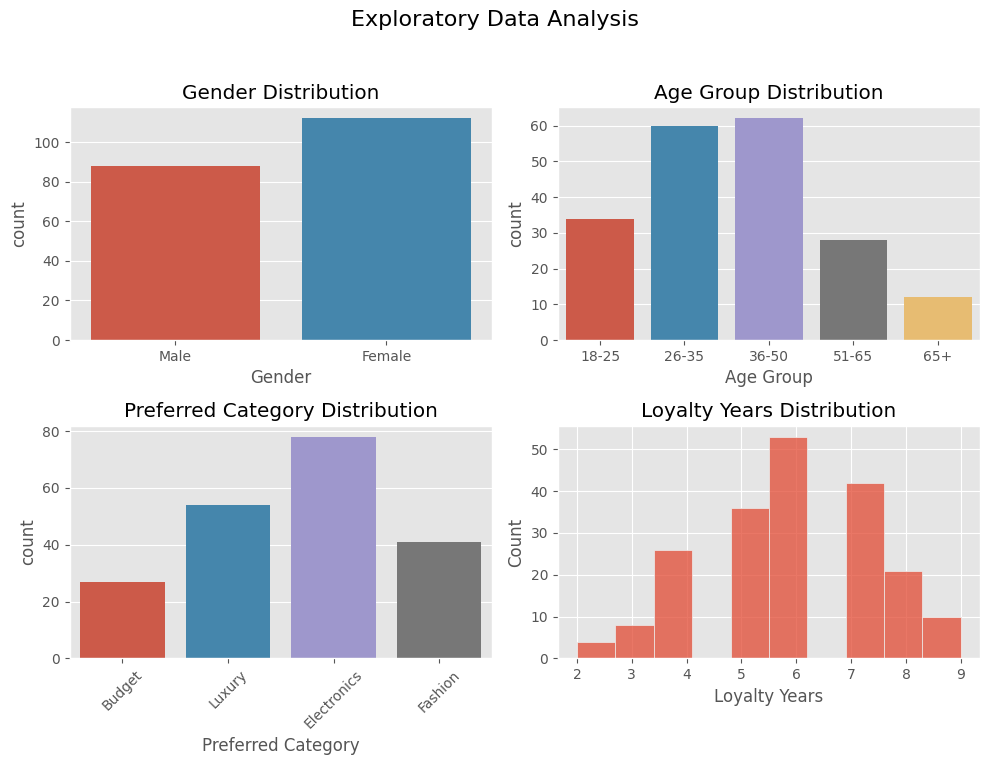

In [4]:
# --- Step 2: 各変数の可視化 ---
# レイアウトの設定
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Exploratory Data Analysis', fontsize=16)

# Genderの分布
sns.countplot(x='Gender', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Gender Distribution')

# Age Groupの分布
# 欠損値を削除
df_cleaned = df.dropna(subset=['Age Group'])
sorted_age_groups = sorted(df_cleaned['Age Group'].unique())
sns.countplot(x='Age Group', data=df_cleaned, ax=axes[0, 1], order=sorted_age_groups)
axes[0, 1].set_title('Age Group Distribution')

# Preferred Categoryの分布
sns.countplot(x='Preferred Category', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Preferred Category Distribution')
axes[1, 0].tick_params(axis='x', rotation=45)

# Loyalty Yearsの分布
sns.histplot(df['Loyalty Years'], bins=10, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Loyalty Years Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('categorical_and_loyalty_distribution.png')

## 3. 変数の分布

- 性別 (Gender): 男女の顧客数はほぼ同数
- 年齢層 (Age Group): 26-35 歳の顧客層が最も多く、次に 36-50 歳が多い
- 好みのカテゴリー (Preferred Category): Luxury (高級品) と Budget (安価品) が人気のカテゴリーで、次いで Fashion (ファッション) と Electronics (電化製品) 
- ロイヤルティ年数 (Loyalty Years): 顧客のロイヤルティ年数は5〜7年の範囲に集中
- 年齢 (Age): 顧客の年齢は、20代から40代にピーク
- 年収 (Annual Income (k$)): 年収は約40千ドルと約80千ドルの2つのグループに分かれているように見える
- 購買スコア (Spending Score (1-100)): 購買スコアは両端が少なく、中央（50前後）が高くなっている正規分布に似た形をしている

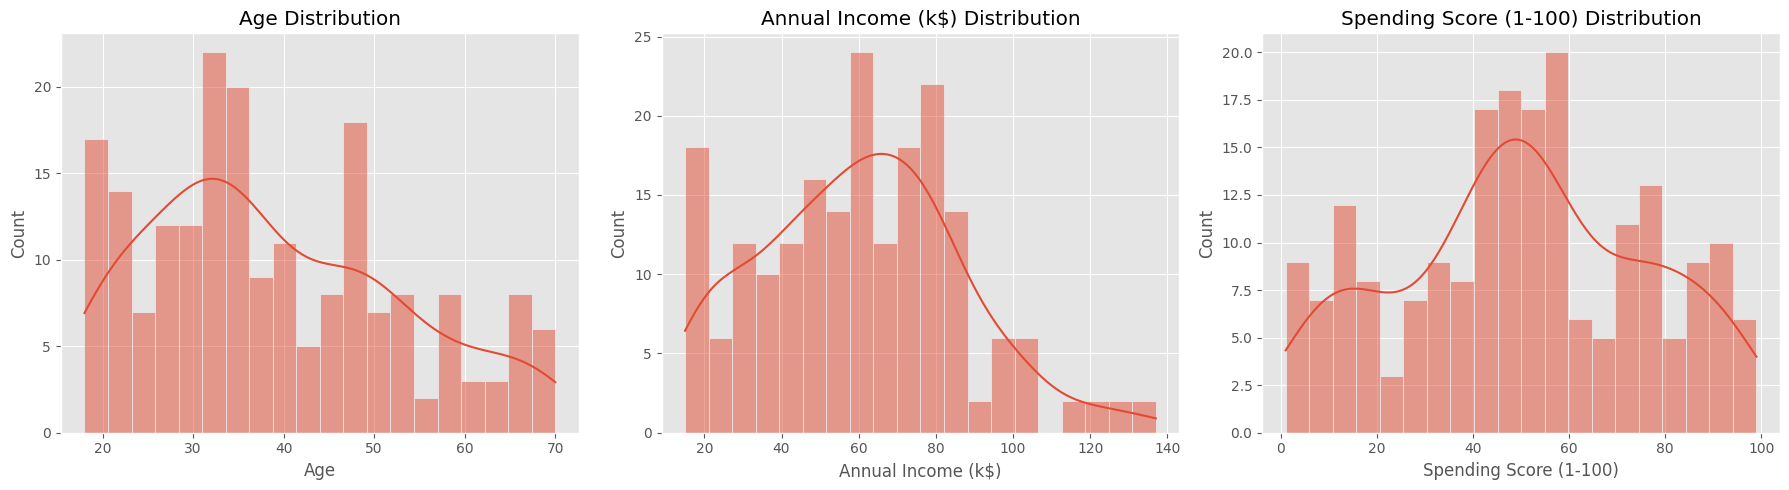

In [5]:
# --- Step 3: 主要な数値変数の分布 ---
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income (k$) Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score (1-100) Distribution')

plt.tight_layout()
plt.savefig('numerical_variable_distributions.png')



## 4. 変数間の関係

**年収と購買スコア:** この散布図から、顧客は主に5つのクラスターに分かれていると考えることができる。
- 高年収・高スコア
- 高年収・低スコア
- 中年収・中スコア
- 低年収・高スコア
- 低年収・低スコア

**性別と年収/購買スコア:**

男女の年収の中央値には大きな違いは見られない。男女の購買スコアの中央値にも大きな違いはなく、分布も似ている。

このデータセットでは、性別は年収や購買行動に大きな影響を与えていない。

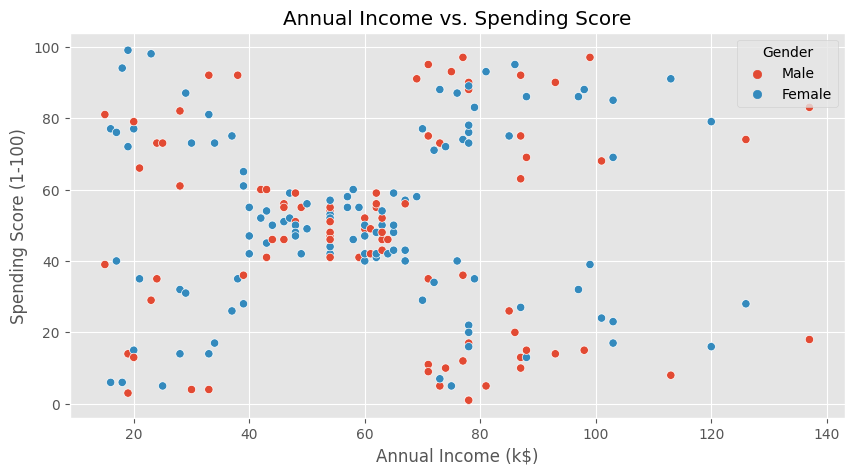

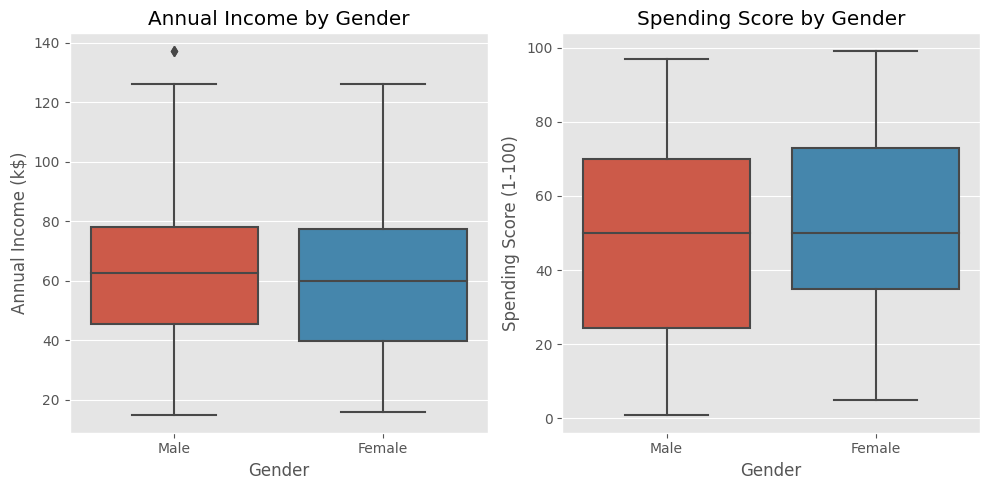

In [6]:
# --- Step 4: 変数間の関係 ---
# 年収と購買スコアの関係
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Annual Income vs. Spending Score')
plt.savefig('income_vs_spending_scatter.png')

# 性別と年収、購買スコアの関係
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df)
plt.title('Annual Income by Gender')

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df)
plt.title('Spending Score by Gender')

plt.tight_layout()
plt.savefig('gender_vs_income_and_spending.png')


EDAで示唆された5つのクラスターについて、K-Meansクラスタリングを用いて詳細な分析を行い、それぞれの顧客セグメントの特性を明らかにしました。

# Cluster Analysis

--- Cluster Summary (Numerical Features) ---
         Count        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                 
0           81  42.716049           55.296296               49.518519   
1           35  41.114286           88.200000               17.114286   
2           23  45.217391           26.304348               20.913043   
3           22  25.272727           25.727273               79.363636   
4           39  32.692308           86.538462               82.128205   

         Estimated Savings (k$)  Credit Score  Loyalty Years  
Cluster                                                       
0                     37.145185    779.543210       6.271605  
1                     77.884857    850.000000       4.485714  
2                     22.541304    654.608696       5.130435  
3                     12.171818    381.136364       6.136364  
4                     39.195641    830.820513       6.871795  

-

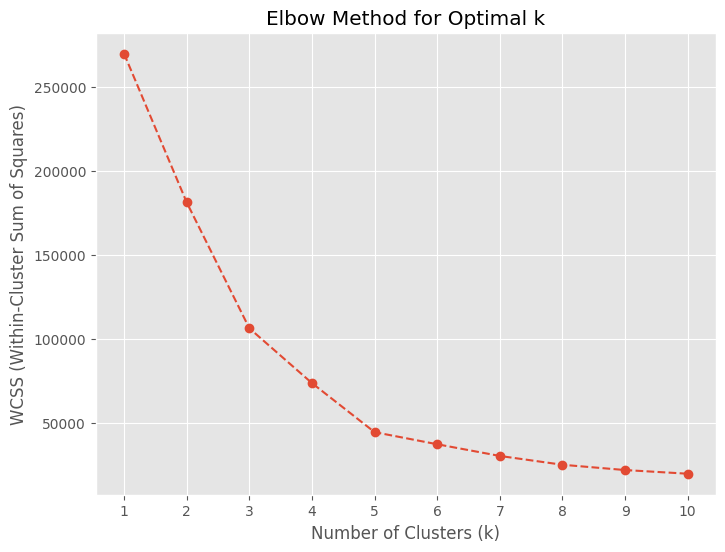

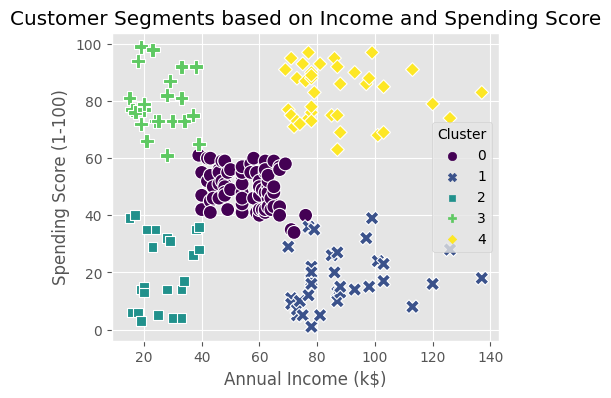

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# クラスタリングに使う特徴量の選択
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# エルボー法による最適なクラスター数（k）の決定
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# エルボー法のグラフのプロット
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.savefig('elbow_method.png')


# 最適なk=5としてK-Meansクラスタリングを実行
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

# クラスタリング結果の可視化
plt.figure(figsize=(5, 4))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', style='Cluster', s=100)
plt.title('Customer Segments based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.savefig('clusters_scatter.png')


# 各クラスターの特性分析
cluster_summary = df.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'Estimated Savings (k$)': 'mean',
    'Credit Score': 'mean',
    'Loyalty Years': 'mean'
}).rename(columns={'CustomerID': 'Count'})

gender_dist = pd.crosstab(df['Cluster'], df['Gender'], normalize='index') * 100
preferred_category_dist = pd.crosstab(df['Cluster'], df['Preferred Category'], normalize='index') * 100

print("--- Cluster Summary (Numerical Features) ---")
print(cluster_summary)
print("\n--- Gender Distribution by Cluster (%) ---")
print(gender_dist)
print("\n--- Preferred Category Distribution by Cluster (%) ---")
print(preferred_category_dist)


## エルボー法によるクラスター数の決定

エルボー法の結果、データセットを5つのクラスターに分割することが最も適切である。

## 顧客セグメントの分析結果

以下の詳細な分析から、5つのクラスター（顧客層）は以下のように分類することができる。

|No|クラスター|特徴|プロファイル|
|:--:|:--:|:--:|:--:|
|0|中年収・中購買スコア層|最も人数の多いクラスター (81名)。年収と購買スコアが共に中程度の値を示す|平均年齢は約42.7歳。信用スコアは比較的高い約780。好みのカテゴリーはElectronicsとFashionに集中|
|1|高年収・高購買スコア層 (理想的な顧客)|年収、購買スコア、ロイヤルティ年数が全て高い理想的な顧客層。|平均年収は約86.5千ドル、平均購買スコアは約82.1。信用スコアは約831と非常に高く、ロイヤルティ年数も約6.9年と長い。好みのカテゴリーはLuxury (高級品) が圧倒的多数を占める。|
|2|低年収・高購買スコア層 (衝動買い傾向)|年収は低いものの、購買スコアが非常に高い衝動買い傾向の顧客層。|平均年収は約25.7千ドル、平均購買スコアは約79.4。平均年齢は約25.3歳と最も若く、信用スコアは約381と最も低い。好みのカテゴリーはLuxury (高級品) が非常に多い。|
|3|高年収・低購買スコア層 (倹約家)|年収は高いものの、購買スコアは非常に低い倹約家の顧客層。|均年収は約88.2千ドル、平均購買スコアは約17.1。信用スコアは約850と非常に高く、推定貯蓄額も約77.9千ドルと最も高い。好みのカテゴリーはElectronicsとFashionに集中。|
|4|低年収・低購買スコア層 (一般) |収も購買スコアも低い、平均的な顧客層。|平均年収は約26.3千ドル、平均購買スコアは約20.9。平均年齢は約45.2歳と比較的高い。この層の顧客はBudget (安価品) を好む傾向が100%であり、価格に敏感な層であることが示唆される。|
